In [ ]:
# Some utilities used in the presentation
using Pkg
Pkg.add("https://github.com/Krastanov/SimpleClifford")
using SimpleClifford

function project(stabilizer, projection_operator)
    s, i, res = project!(copy(stabilizer), projection_operator)
    if isnothing(res)
        println("The projection caused a random phase for stabilizer operator at row $(i)!")
    else
        println("The projection had a definite result ", ["+1","-1"][res÷2+1])
    end
    s, i, res
end

<h1 style="text-align: center;">Quantum Error Correction Tutorial</h1>

<h2 style="text-align: center;">Stefan Krastanov</h2>

<h3 style="text-align: center;">Aliro - Dec 2019</h3>

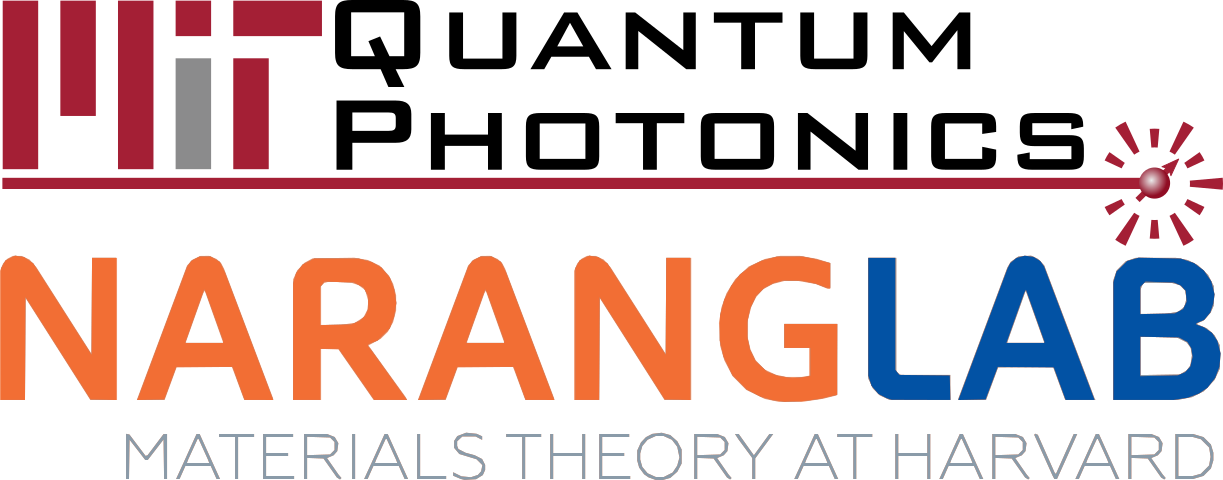

# 1. Classical Error Correcting Codes

# 2. "No Clonning" and Other Quantum Challenges

# 3. Stabilizer Codes and the Stabilizer Formalism

# 1. Classical Error Correcting Codes

# Redundant Encoding of Information

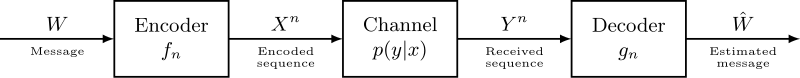

# Random Codes

Encode plain-text words (e.g. 0 and 1 for single-bit words) into larger random code words (e.g. random 10-bit strings for 1-to-10 redundancy).

In [ ]:
codeword0 = rand([0,1],10)
codeword1 = rand([0,1],10)

encode(w) = if w==0 codeword0 else codeword1 end;

Let us simulate the error channel (a simple bit-flip channel).

In [ ]:
generate_bitflips() = rand(10) .< 0.1 # flip probability of 0.1
addnoise(c) = c .⊻ generate_bitflips(); # ⊻, ⊕, xor denote the same operation

To decode, we search for the "pure" codeword closest to the noisy codeword we were given.

In [ ]:
errorcounts(c) = [sum(c .!= codeword0), sum(c .!= codeword1)];
decode(c) = argmin(errorcounts(c))-1 # -1 because Julia has base-1 arrays

In [ ]:
decode(addnoise(encode(0)))

In [ ]:
wrong_count = 0
attempts = 1000
for i in 1:attempts
    wrong_count += decode(addnoise(encode(0))) != 0
end
wrong_count / attempts

# Random Codes are Impractical

To encode n-bit words you need a random dictionary of size $2^n$ saved in memory.

To decode you need to iterate through all $2^n$ codewords to see which one is closest.

# Linear Binary Codes

Practically all classical error correcting codes are **Linear** Codes. The constraints that the redundant code words fullfil are encoded in a system of **linear** equations.

### e.g. a repetition code

Bit $w_0$ is encoded in bits $b_0, b_1, b_2$ such that

$0 \mapsto 0 0 0 $ and $1 \mapsto 1 1 1$.

In other words, $b_0, b_1, b_2$ fulfill the following system of (binary) equations:

$b_0 \mathbin{\oplus} b_1 = 0$

$b_1 \mathbin{\oplus} b_2 = 0$

# Parity Check Matrix

The system of equations 

$b_0 \mathbin{\oplus} b_1 = 0$

$b_1 \mathbin{\oplus} b_2 = 0$

can be written in matrix form:

$\left[\begin{matrix}1&1&0\\0&1&1\end{matrix}\right]
\left[\begin{matrix}b_0\\b_1\\b_2\end{matrix}\right] =
\left[\begin{matrix}0\\0\end{matrix}\right]$

This matrix, usually denoted $H$ is the parity-check matrix.

# The Other "Linearity" in these Codes

Linear combinations of codewords are still codewords. Encoding is a linear operation.

Consider a 2bit words $w_0, w_1$ encoded in an (almost) repetition code: 

$0 1 \mapsto 0 0 1 1 1 $ and $1 0 \mapsto 1 1 1 0 0 $

writen as a linear operation

$ \left[\begin{matrix}w_0\\w_1\end{matrix}\right]
\left[\begin{matrix}1&1&1&0&0\\0&0&1&1&1\end{matrix}\right]
= \left[\begin{matrix}b_0&b_1&b_2&b_3&b_4\end{matrix}\right]$

The transpose of this matrix, usually denoted $G$, is the generator matrix of the code.

# 2. "No Cloning"  and Other Quantum Challenges

# How to Create Quantum Redundancy?

$|\Psi\rangle \mapsto |\Psi\rangle\otimes|\Psi\rangle$ is not a linear operation, hence it is forbidden in quantum mechanics (the no-clonning theorem).

But we can be inspired by linear codes and simply "reserve" some ancillary registers with known initial states:

$|\Psi\rangle\otimes|0\rangle \mapsto |\Psi\rangle\otimes|\Psi\rangle$

$|\Phi\rangle\otimes|0\rangle \mapsto |\Phi\rangle\otimes|\Phi\rangle$

By linearity we also get:

$(|\Psi\rangle+|\Phi\rangle)\otimes|0\rangle \mapsto |\Psi\rangle\otimes|\Psi\rangle+|\Phi\rangle\otimes|\Phi\rangle$

This dealt with the arguments against quantum mechanics being able to provide redundancy (the encoding step).

But how can we decode without measuring the state (because measuring would destroy quantum superpositions)?

# Measuring a Syndrome

Measure something that tells you whether there is an error, but does not distinguish between different logic states.

# Example

$a|000\rangle+b|111\rangle$ is a state in the logical space

Different errors can cause: $a|100\rangle+b|011\rangle$, $a|010\rangle+b|101\rangle$, or $a|001\rangle+b|110\rangle$.

Measure only the "syndrome", or in this case the overall parity.

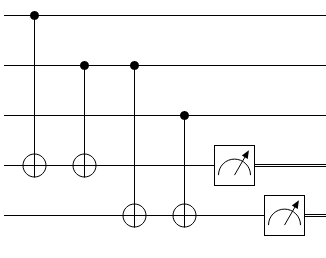

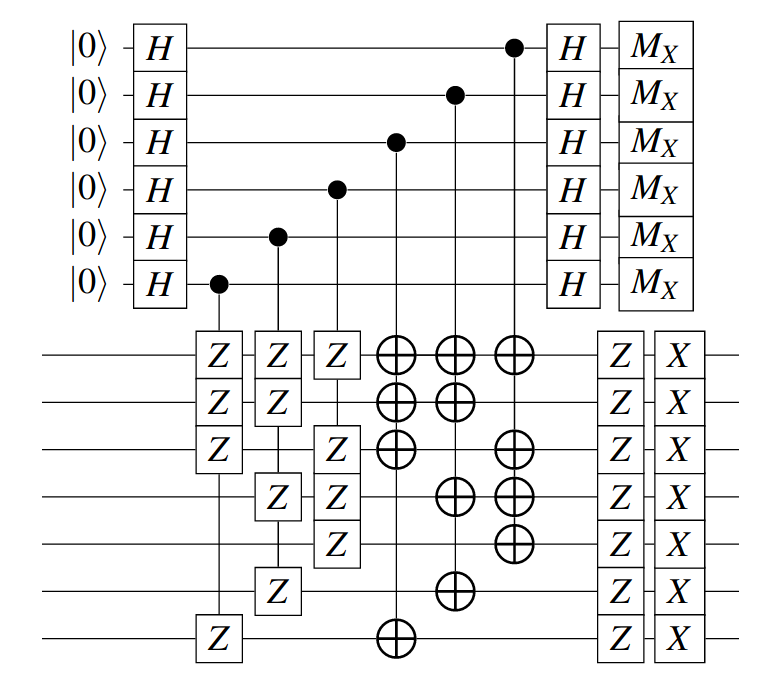

# 3. Stabilizer Codes and the Stabilizer Formalism

# Identifying States as Eigenvectors for Pauli Operators

$I\equiv {\begin{bmatrix}1&0\\0&1\end{bmatrix}},\ X\equiv {\begin{bmatrix}0&1\\1&0\end{bmatrix}},\ Y\equiv {\begin{bmatrix}0&-i\\i&0\end{bmatrix}},\ Z\equiv {\begin{bmatrix}1&0\\0&-1\end{bmatrix}}$

${\displaystyle {\begin{aligned}\psi _{x+}&={\frac {1}{\sqrt {2}}}{\begin{pmatrix}1\\1\end{pmatrix}},&\psi _{x-}&={\frac {1}{\sqrt {2}}}{\begin{pmatrix}-1\\1\end{pmatrix}},\\\psi _{y+}&={\frac {1}{\sqrt {2}}}{\begin{pmatrix}1\\i\end{pmatrix}},&\psi _{y-}&={\frac {1}{\sqrt {2}}}{\begin{pmatrix}i\\1\end{pmatrix}},\\\psi _{z+}&={\begin{pmatrix}1\\0\end{pmatrix}},&\psi _{z-}&={\begin{pmatrix}0\\1\end{pmatrix}}.\end{aligned}}}$

We can describe some states of multiple qubits by specifying the projective measurements that leave them unperturbed.

These are the **Stabilizer** operators for the given state.

Listing all the stabilizer operators for a quantum code is akin to listing all the linear constraints for a classical linear code:

The repetition code that encodes $a|0\rangle+b|1\rangle \mapsto a|000\rangle+b|111\rangle$ has stabilizer operators

```
ZZI
IZZ
```

By the way, count the number of constraints! They inform us of how many logical qubits we have encoded on top of our physical qubits.

**This "Stabilizer formalism" is incredibly important insight into the use of typical qubit codes.**

1. **It lets us simulate stabilizer codes over $n$ qubits by using $\approx n^2$ memory, instead of $2^n$ memory**
2. **It lets us use tools for classical codes, as we will see shortly**

# Writing an Error Word as an Error Acting on a Code Word

# $H \cdot (\vec{W}\oplus \vec{E}) = H\cdot\vec{W}\oplus H\cdot\vec{E} = 0 \oplus \vec{S} = \vec{S}$

This lets us track just errors, instead of having to track each possible logic state.

Instead of classical bit-flips we have X, Y, and Z errors, but we can mimic them as a classical binary codes by using two bits to describe each possible error:

$00\to I,\,\,01\to X,\,\,11\to Y,\,\,10\to Z$

In [ ]:
state = S"ZZI
          IZZ"

In [ ]:
stab_to_gf2(state)

In [ ]:
pauli = P"ZZI"

In [ ]:
project(state, pauli)

In [ ]:
error = P"XII"
error*state

In [ ]:
project(error*state, pauli)

# A Case Study:  Code to Correct 1-qubit Errors

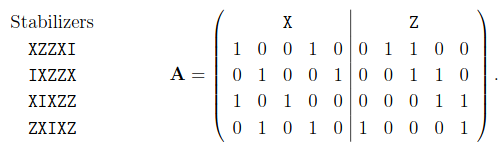

In [ ]:
code = S"XZZXI
         IXZZX
         XIXZZ
         ZXIXZ"

In [ ]:
single_x(5,1)